# **Correlação de Pearson**

In [11]:
import pandas as pd

dataset = pd.read_csv('Breast_cancer.csv', encoding = 'utf8')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Clump_Thickness        699 non-null    int64 
 1   Cell_Size_Uniformity   699 non-null    int64 
 2   Cell_Shape_Uniformity  699 non-null    int64 
 3   Marginal_Adhesion      699 non-null    int64 
 4   Single_Epi_Cell_Size   699 non-null    int64 
 5   Bare_Nuclei            699 non-null    object
 6   Bland_Chromatin        699 non-null    int64 
 7   Normal_Nucleoli        699 non-null    int64 
 8   Mitoses                699 non-null    int64 
 9   Class                  699 non-null    object
dtypes: int64(8), object(2)
memory usage: 54.7+ KB


In [12]:
# Obtendo os nomes das colunas Numéricas
tipos_numericos = ['int64']
att_numericos = dataset.select_dtypes(include = tipos_numericos)

## selecionando as colunas
att_numericos= list(att_numericos.columns)

dataset_numerico = dataset[att_numericos] # Features
print(dataset_numerico)

     Clump_Thickness  Cell_Size_Uniformity  Cell_Shape_Uniformity  \
0                  5                     1                      1   
1                  5                     4                      4   
2                  3                     1                      1   
3                  6                     8                      8   
4                  4                     1                      1   
..               ...                   ...                    ...   
694                3                     1                      1   
695                2                     1                      1   
696                5                    10                     10   
697                4                     8                      6   
698                4                     8                      8   

     Marginal_Adhesion  Single_Epi_Cell_Size  Bland_Chromatin  \
0                    1                     2                3   
1                    5                   

***Matriz de Correlação***

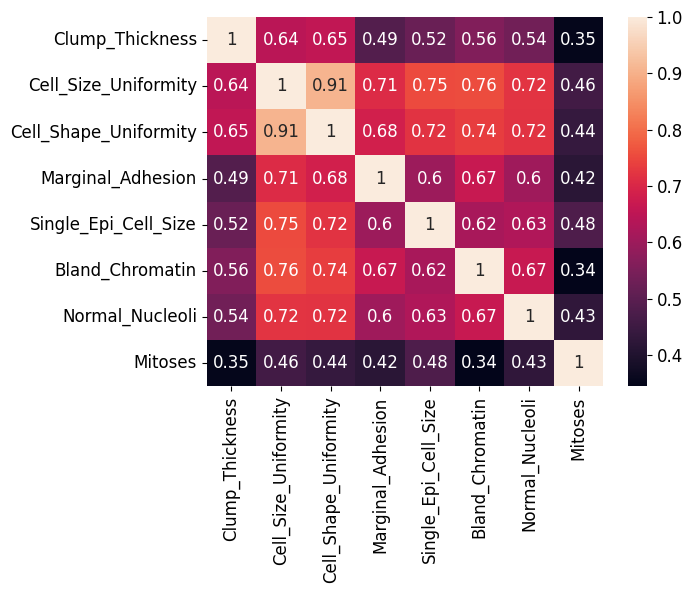

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt

pearson = dataset_numerico.corr(method = 'pearson')
sn.heatmap(pearson, annot = True)
plt.show()

***Seleção de Atributos***

In [51]:
dataset2 = pd.read_csv('Image.csv', encoding = 'utf-8')

dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    2310 non-null   int64  
 1   att2    2310 non-null   int64  
 2   att3    2310 non-null   int64  
 3   att4    2310 non-null   float64
 4   att5    2310 non-null   float64
 5   att6    2310 non-null   float64
 6   att7    2310 non-null   float64
 7   att8    2310 non-null   float64
 8   att9    2310 non-null   float64
 9   att10   2310 non-null   float64
 10  att11   2310 non-null   float64
 11  att12   2310 non-null   float64
 12  att13   2310 non-null   float64
 13  att14   2310 non-null   float64
 14  att15   2310 non-null   float64
 15  att16   2310 non-null   float64
 16  att17   2310 non-null   float64
 17  att18   2310 non-null   float64
 18  att19   2310 non-null   float64
 19  Class   2310 non-null   object 
dtypes: float64(16), int64(3), object(1)
memory usage: 361.1+ KB


In [52]:
# Obtendo todas as colunas exceto a última
dataset_numerico = dataset2.iloc[:, :-1] # Features

### Pegando o rótulo
rotulo = dataset2.Class      # Target variable (classe)

dataset_numerico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    2310 non-null   int64  
 1   att2    2310 non-null   int64  
 2   att3    2310 non-null   int64  
 3   att4    2310 non-null   float64
 4   att5    2310 non-null   float64
 5   att6    2310 non-null   float64
 6   att7    2310 non-null   float64
 7   att8    2310 non-null   float64
 8   att9    2310 non-null   float64
 9   att10   2310 non-null   float64
 10  att11   2310 non-null   float64
 11  att12   2310 non-null   float64
 12  att13   2310 non-null   float64
 13  att14   2310 non-null   float64
 14  att15   2310 non-null   float64
 15  att16   2310 non-null   float64
 16  att17   2310 non-null   float64
 17  att18   2310 non-null   float64
 18  att19   2310 non-null   float64
dtypes: float64(16), int64(3)
memory usage: 343.0 KB


In [53]:
print(dataset_numerico)

      att1  att2  att3      att4  att5      att6      att7      att8  \
0      140   125     9  0.000000   0.0  0.277778  0.062963  0.666667   
1      188   133     9  0.000000   0.0  0.333333  0.266667  0.500000   
2      105   139     9  0.000000   0.0  0.277778  0.107407  0.833333   
3       34   137     9  0.000000   0.0  0.500000  0.166667  1.111111   
4       39   111     9  0.000000   0.0  0.722222  0.374074  0.888889   
...    ...   ...   ...       ...   ...       ...       ...       ...   
2305    32   158     9  0.000000   0.0  0.944445  0.862963  0.833333   
2306     8   162     9  0.111111   0.0  1.611111  2.062962  0.333333   
2307   128   161     9  0.000000   0.0  0.555555  0.251852  0.777778   
2308   150   158     9  0.000000   0.0  2.166667  1.633334  1.388889   
2309   124   162     9  0.111111   0.0  1.388889  1.129630  2.000000   

          att9      att10     att11      att12     att13     att14      att15  \
0     0.311111   6.185185  7.333334   7.666666  3.5555

***Mostrando a Matriz de Correlação***

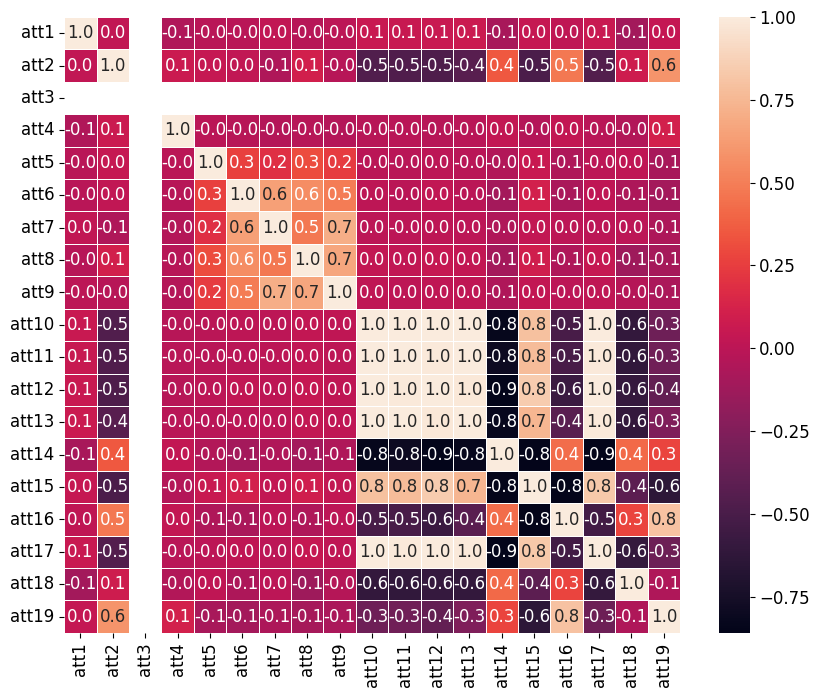

In [54]:
import seaborn as sn
import matplotlib.pyplot as plt

pearson = dataset_numerico.corr(method = 'pearson')

# Create an annotated heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
plt = sn.heatmap(pearson, annot = True, fmt = '.1f', square=True, linewidths = .5)

In [55]:
dataset_numerico.drop('att3', axis=1, inplace=True)
dataset_numerico.drop('att11', axis=1, inplace=True)
dataset_numerico.drop('att12', axis=1, inplace=True)
dataset_numerico.drop('att13', axis=1, inplace=True)
dataset_numerico.drop('att17', axis=1, inplace=True)

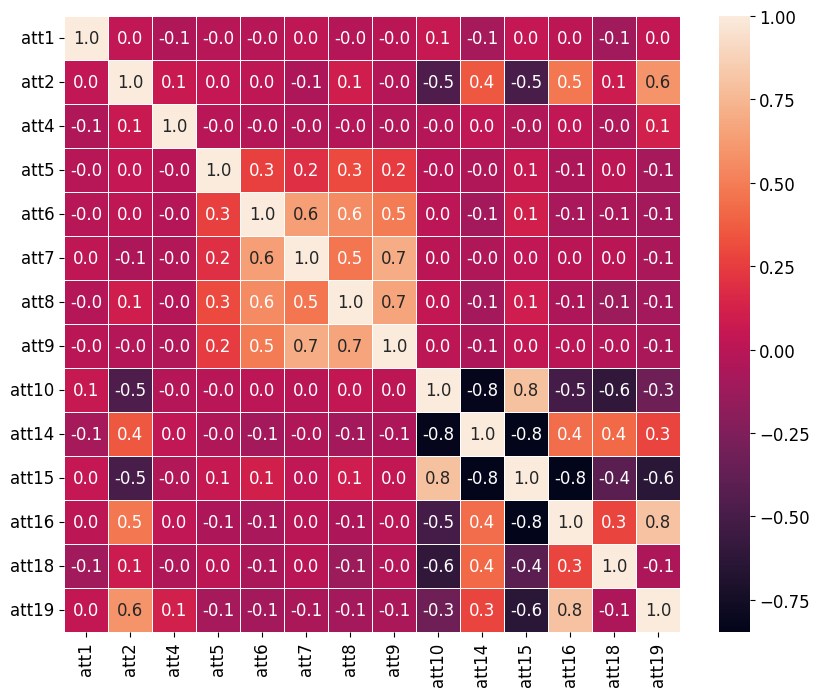

In [56]:
import seaborn as sn
import matplotlib.pyplot as plt

pearson = dataset_numerico.corr(method = 'pearson')

# Create an annotated heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
plt = sn.heatmap(pearson, annot = True, fmt = '.1f', square=True, linewidths = .5)

In [57]:
import numpy as np

# só positivas acima disso acionam remoção
threshold = 0.75

# Matriz de Correlação
corr = dataset_numerico.corr(method='pearson')

# Mantém só a parte superior da matriz (evita pares duplicados)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Remove APENAS a "segunda" coluna de cada par com correlação positiva alta
to_drop = [col for col in upper.columns if (upper[col] >= threshold).any()]

# DataFrame final
df = dataset_numerico.drop(columns=to_drop)

# (Opcional) Log rápido do que foi removido/mantido
for col in upper.columns:
    # pares com correlação positiva alta (acionam remoção)
    pos_pairs = list(upper.index[upper[col] >= threshold])
    # pares com correlação negativa forte (mantidos por regra)
    neg_pairs = list(upper.index[upper[col] <= -threshold])
    for c in pos_pairs:
        print(f"Removendo: {col} (ρ={corr.loc[c, col]:.3f} com {c})")
    for c in neg_pairs:
        print(f"Mantendo (negativa): {col} (ρ={corr.loc[c, col]:.3f} com {c})")

print(f"\nTotal removidas (positivas): {len(to_drop)}")

Mantendo (negativa): att14 (ρ=-0.830 com att10)
Removendo: att15 (ρ=0.792 com att10)
Mantendo (negativa): att15 (ρ=-0.846 com att14)
Mantendo (negativa): att16 (ρ=-0.846 com att15)
Removendo: att19 (ρ=0.800 com att16)

Total removidas (positivas): 2


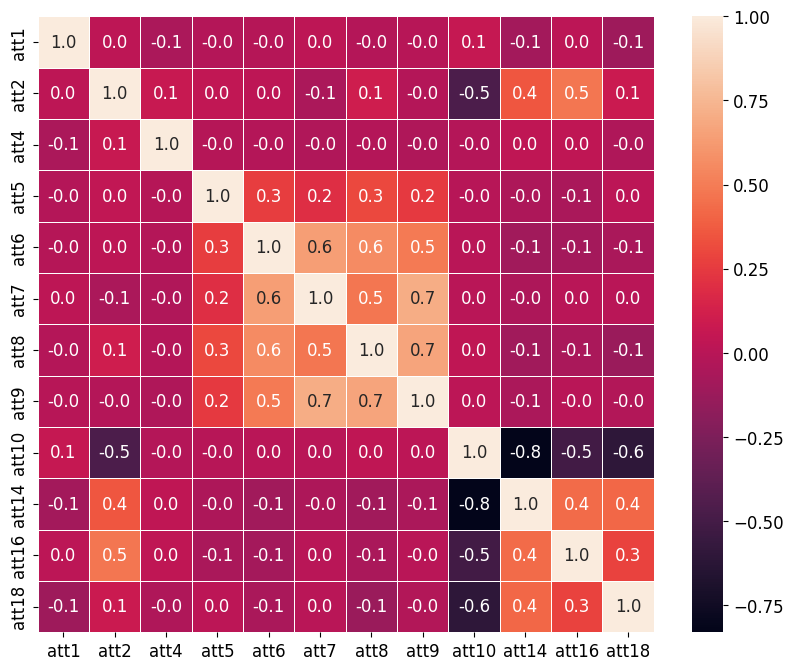

In [58]:
import seaborn as sn
import matplotlib.pyplot as plt

pearson2 = df.corr(method = 'pearson')

# Create an annotated heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
plt = sn.heatmap(pearson2, annot = True, fmt = '.1f', square=True, linewidths = .5)

In [59]:
dataset3 = pd.read_csv('Semeion.csv', encoding = 'utf-8')

dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Columns: 257 entries, a_0 to class
dtypes: int64(257)
memory usage: 3.1 MB


In [60]:
# Obtendo todas as colunas exceto a última
dataset2_numerico = dataset3.iloc[:, :-1] # Features

dataset2_numerico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Columns: 256 entries, a_0 to a_255
dtypes: int64(256)
memory usage: 3.1 MB


In [62]:
# calcular correlação absoluta (para capturar intensidade, independente do sinal)
corr = dataset2_numerico.corr(method='pearson')

# "desempilhar" em formato de pares
corr_pairs = corr.unstack()

# remover duplicados e self-correlations
corr_pairs = corr_pairs.drop(labels=[(col, col) for col in corr.columns])
corr_pairs = corr_pairs.drop_duplicates()

# ordenar por correlação
sorted_corr = corr_pairs.abs().sort_values(ascending=False)

# pegar os 20 mais fortes
top_corr = sorted_corr.head(30)

print(top_corr)

a_6    a_7      0.808771
a_190  a_206    0.798533
a_5    a_6      0.798287
a_46   a_62     0.797173
a_174  a_190    0.794071
a_176  a_177    0.790442
a_4    a_5      0.789421
a_144  a_145    0.786870
a_2    a_3      0.782672
a_160  a_161    0.780703
a_192  a_193    0.780228
a_3    a_4      0.778919
a_7    a_8      0.777302
a_8    a_9      0.776501
a_62   a_78     0.772073
a_78   a_94     0.765458
a_228  a_229    0.763033
a_49   a_65     0.762458
a_229  a_230    0.761104
a_65   a_81     0.752373
a_110  a_111    0.752151
a_128  a_129    0.750722
a_133  a_134    0.750339
a_230  a_231    0.750277
a_226  a_227    0.747781
a_150  a_151    0.746784
a_161  a_177    0.745827
a_233  a_234    0.744058
a_134  a_135    0.743926
a_231  a_232    0.742060
dtype: float64
